### Import bibliotek

In [67]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Wczytanie i przygotowanie danych

In [110]:
print(*[filename.removesuffix(".json") for filename in os.listdir("./opinions")], sep="\n")

156103510
175451294
84514582


In [111]:
product_id = input("Podaj kod produktu: ")
reviews = pd.read_json(f"./opinions/{product_id}.json").set_index("review_id")
reviews

,author,recomendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
19425088,M...l,Polecam,5/5,MacBook Pro 2024 z M4 to świetne rozwiązanie d...,"[jakość, wydajność, wygląd]",[],1,1,2025-02-04 16:28:03,2025-01-28 10:51:01
19391098,k...t,Polecam,5/5,Mistrz w swojej klasie 🤩,"[jakość, wydajność, wygląd]",[],1,1,2025-01-21 19:42:43,2024-12-17 01:04:09


In [112]:
reviews.stars = reviews.stars.apply(lambda s: s.split("/")[0].replace(",", ".")).astype(float)
reviews.likes = reviews.likes.astype(int)
reviews.dislikes = reviews.dislikes.astype(int)
reviews


,author,recomendation,stars,content,pros,cons,likes,dislikes,publish_date,purchase_date
review_id,,,,,,,,,,
19425088,M...l,Polecam,5.0,MacBook Pro 2024 z M4 to świetne rozwiązanie d...,"[jakość, wydajność, wygląd]",[],1,1,2025-02-04 16:28:03,2025-01-28 10:51:01
19391098,k...t,Polecam,5.0,Mistrz w swojej klasie 🤩,"[jakość, wydajność, wygląd]",[],1,1,2025-01-21 19:42:43,2024-12-17 01:04:09


### Podstawowe statystki 

In [113]:
reviews_count = reviews.shape[0]
pros_count = reviews.pros.astype(bool).sum()
cons_count = reviews.cons.astype(bool).sum()
pros_cons_count = reviews.apply(lambda r: bool(r.pros) and bool(r.cons), axis=1).sum()
avg_stars = round(reviews.stars.mean(), 2)

print(f"Liczba opinii o produkcie: {reviews_count}")
print(f"Liczba opinii przy których została podana lista zalet: {pros_count}")
print(f"Liczba opinii przy których została podana lista wad: {cons_count}")
print(f"Liczba opinii przy których została podana lista zalet oraz lista wad: {pros_cons_count}")
print(f"Średnia liczba gwiazdek dla produktu: {avg_stars}")


Liczba opinii o produkcie: 2
Liczba opinii przy których została podana lista zalet: 2
Liczba opinii przy których została podana lista wad: 0
Liczba opinii przy których została podana lista zalet oraz lista wad: 0
Średnia liczba gwiazdek dla produktu: 5.0


In [114]:
pros = reviews.pros.explode().value_counts()
pros

pros
jakość       2
wydajność    2
wygląd       2
Name: count, dtype: int64

In [115]:
cons = reviews.cons.explode().value_counts()
cons


Series([], Name: count, dtype: int64)

### Wykresy

In [116]:
recomendation = reviews.recomendation.value_counts(dropna=False).reindex(['Nie polecam', 'Polecam', None], fill_value=0)
recomendation

recomendation
Nie polecam    0
Polecam        2
None           0
Name: count, dtype: int64

<Axes: >

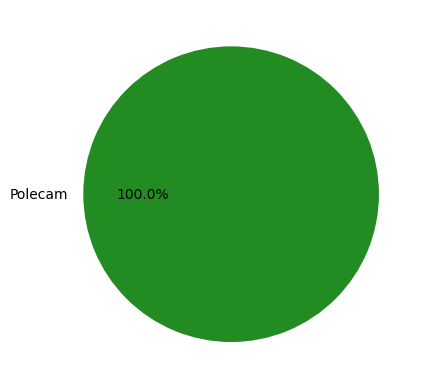

In [117]:
recomendation.plot.pie(
    label = "",
    labels = ['Nie polecam', 'Polecam', 'Nie mam zdania'],
    colors = ['crimson', 'forestgreen', 'khaki'],
    autopct = lambda x: f"{x:1.1f}%" if x>0 else ""
    )